In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/deliveries.csv"
data = pd.read_csv(file_path)

# calculate bowling performance metrics
bowler_data = data[['match_id', 'bowler', 'is_wicket', 'total_runs']]

# Aggregate data by match and bowler
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),  # Total wickets per match
    runs_conceded=('total_runs', 'sum')  # Total runs conceded per match
).reset_index()

#print(performance)

# Choose a bowler to analyze
bowler_name= 'RP Singh'
bowler_timeseries = performance[performance['bowler'] == bowler_name].set_index('match_id')['wickets']
print(bowler_timeseries)
# Sort the series by match_id
bowler_timeseries = bowler_timeseries.sort_index()

# Train an ARIMA model
model = ARIMA(bowler_timeseries, order=(2, 1, 2))  # ARIMA(p=2, d=1, q=2)
model_fit = model.fit()

# Forecast wickets for the next 10 matches
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

match_id
335986    1
335988    1
335990    2
335994    2
335999    0
         ..
598068    0
980901    1
980911    0
980969    1
980979    1
Name: wickets, Length: 82, dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

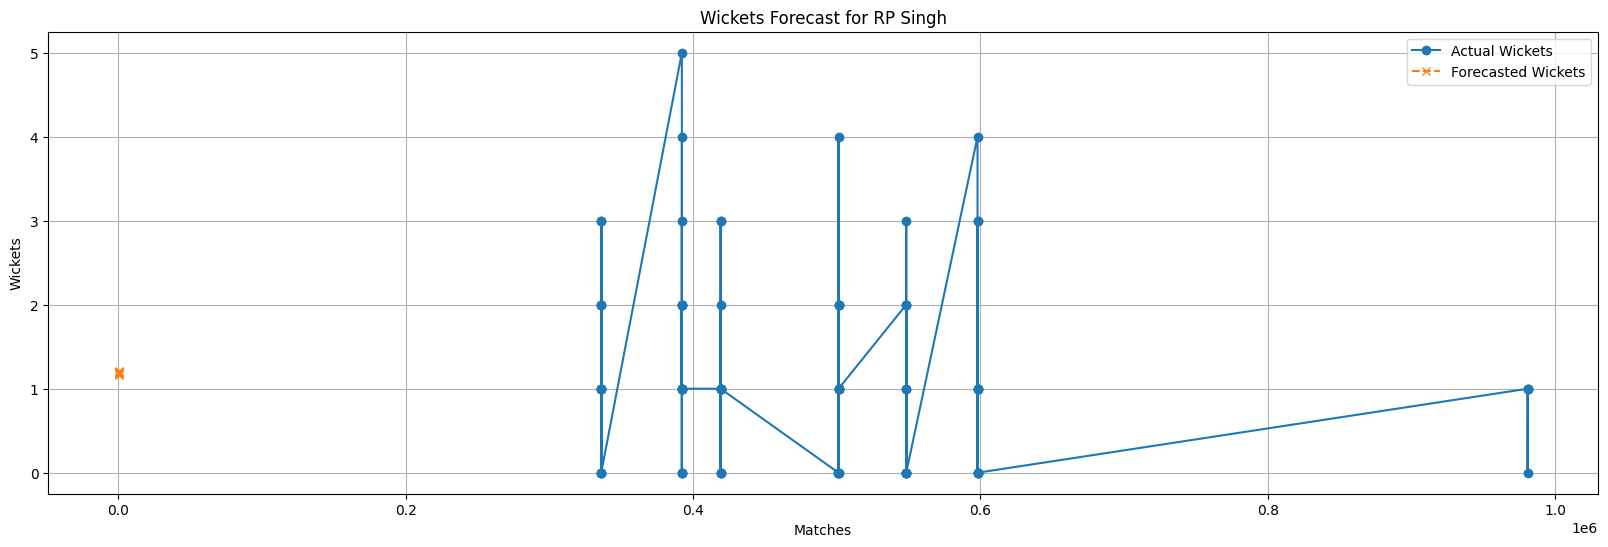

Forecasted wickets for the next 10 matches:
82    1.213441
83    1.200835
84    1.166715
85    1.202714
86    1.175043
87    1.194188
88    1.181543
89    1.189706
90    1.184498
91    1.187799
Name: predicted_mean, dtype: float64


In [ ]:
# Plot the actual vs forecasted values
plt.figure(figsize=(20, 6))
plt.plot(bowler_timeseries, label='Actual Wickets', marker='o')
plt.plot(range(len(bowler_timeseries), len(bowler_timeseries) + forecast_steps), forecast, label='Forecasted Wickets', marker='x', linestyle='--')
plt.title(f'Wickets Forecast for {bowler_name}')
plt.xlabel('Matches')
plt.ylabel('Wickets')
plt.legend()
plt.grid(True)
plt.show()

# Print forecasted values
print(f"Forecasted wickets for the next {forecast_steps} matches:")
print(forecast)

In [ ]:
# calculate bowling performance metrics
bowler_data = data[['match_id', 'bowler', 'is_wicket', 'total_runs']]

# Aggregate data by match and bowler
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

# Aggregate performance metrics
bowler_summary = performance.groupby('bowler').agg(
    total_wickets=('wickets', 'sum'),
    total_runs_conceded=('runs_conceded', 'sum'),
    matches_played=('match_id', 'nunique')
).reset_index()

# Calculate additional metrics
bowler_summary['average_runs_conceded'] = bowler_summary['total_runs_conceded'] / bowler_summary['matches_played']
bowler_summary['wickets_per_match'] = bowler_summary['total_wickets'] / bowler_summary['matches_played']

# Sort bowlers by total wickets and select the top 10
top_bowlers = bowler_summary.sort_values(by='total_wickets', ascending=False).head(10)
top_bowlers


,bowler,total_wickets,total_runs_conceded,matches_played,average_runs_conceded,wickets_per_match
524,YS Chahal,213,4681,159,29.440252,1.339623
119,DJ Bravo,207,4436,158,28.075949,1.310127
348,PP Chawla,201,5179,191,27.115183,1.052356
446,SP Narine,200,4672,175,26.697143,1.142857
355,R Ashwin,198,5435,208,26.129808,0.951923
71,B Kumar,195,5051,176,28.698864,1.107955
438,SL Malinga,188,3486,122,28.573770,1.540984
8,A Mishra,183,4193,162,25.882716,1.129630
193,JJ Bumrah,182,3840,133,28.872180,1.368421
373,RA Jadeja,169,4917,211,23.303318,0.800948


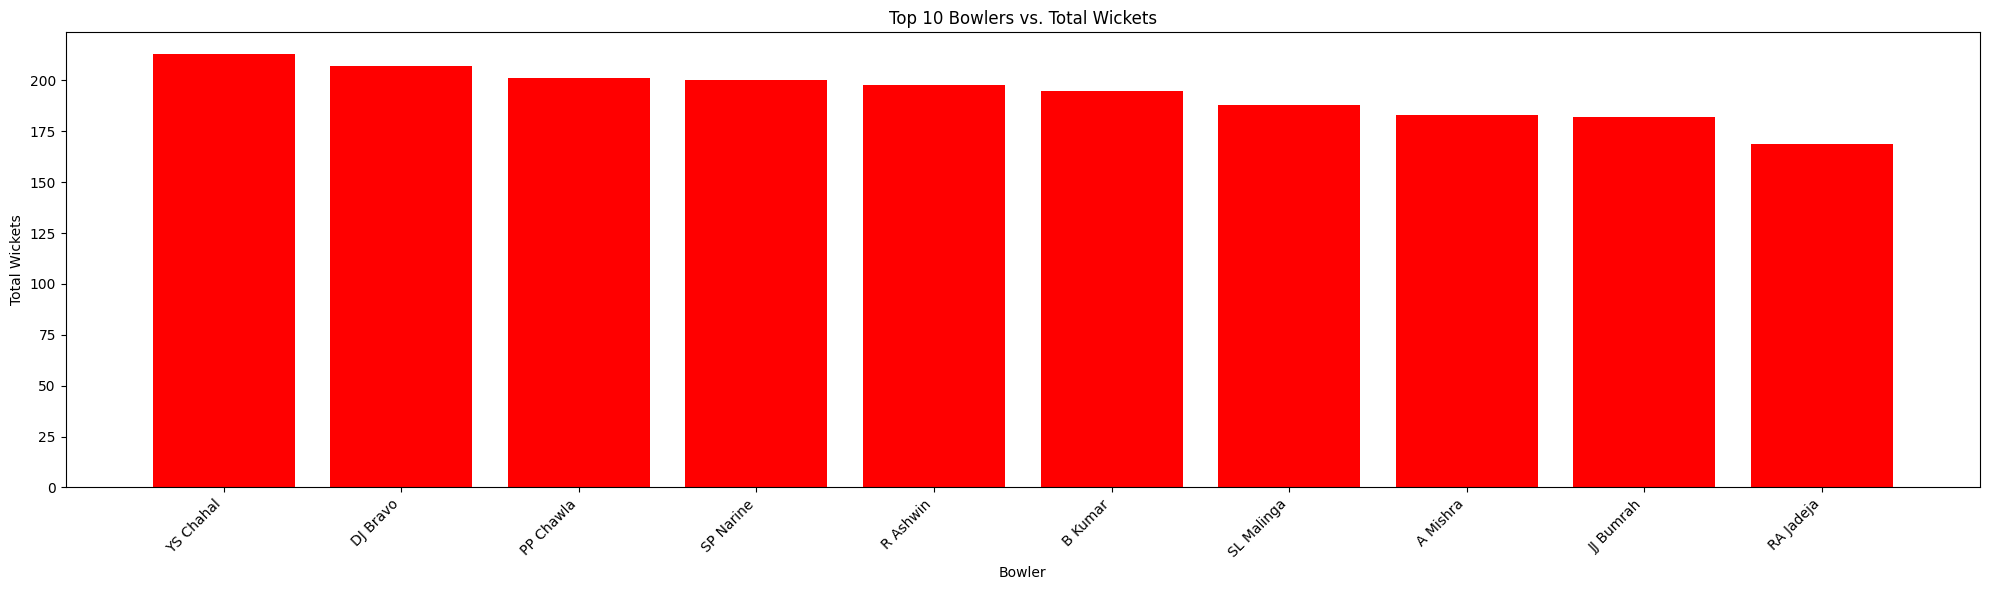

In [ ]:
# bar chart of top 10 bowler vs total wickets

# Create the bar chart
plt.figure(figsize=(20, 6))
plt.bar(top_bowlers['bowler'], top_bowlers['total_wickets'], color='red')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title('Top 10 Bowlers vs. Total Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()